In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# First generating a set of landmarks (px,py)
N = 20
px = np.random.rand(N)
py = np.random.rand(N)

# Number of iterates
NUM= 1000

In [15]:
# Intialise pose SE(3) element
#P_0= np.identity(4)
P_0= np.array([[1,0,0,0.7], [0,1,0,0.5], [0,0,1,0], [0,0,0,1]])

xp_0= np.array([[0.7],[0.5],[0],[1]])

# Initialise velocity se(3) element 
vx= 0
vy= 4
vz= 0

ox=0
oy=0
oz=10

U_0= np.array([[0,-oz,oy,vx], [oz,0,-ox,vy], [-oy,ox,0,vz], [0,0,0,0]])

# Initialise time step
dt= 0.001

#print(xp_0)

In [16]:
from scipy.linalg import expm, sinm, cosm

# Solving P'= PU
P= np.array([P_0])
xp= np.array([xp_0])

jolly= np.array([[0],[0],[0],[1]])

# U at time t
#U_t= np.array([[0,-10,0,-2*np.sin(10*t)], [10,0,0,2*np.cos(10*t)], [0,0,0,0], [0,0,0,0]])

for i in range(NUM):
    #P= np.append(P, [P_0], axis=0)
    U_t= np.array([[0,-oz,0,-vy*np.sin(oz*i*dt)], [oz,0,0,vy*np.cos(oz*i*dt)], [0,0,0,0], [0,0,0,0]])
    PT= np.matmul(P[i],expm(U_t*dt))
    xp=np.append(xp, [np.matmul(PT,jolly)], axis=0)
    P= np.append(P, [PT], axis=0)

#print(P)
#print(xp)
#print(xp[2][2])

<IPython.core.display.Javascript object>


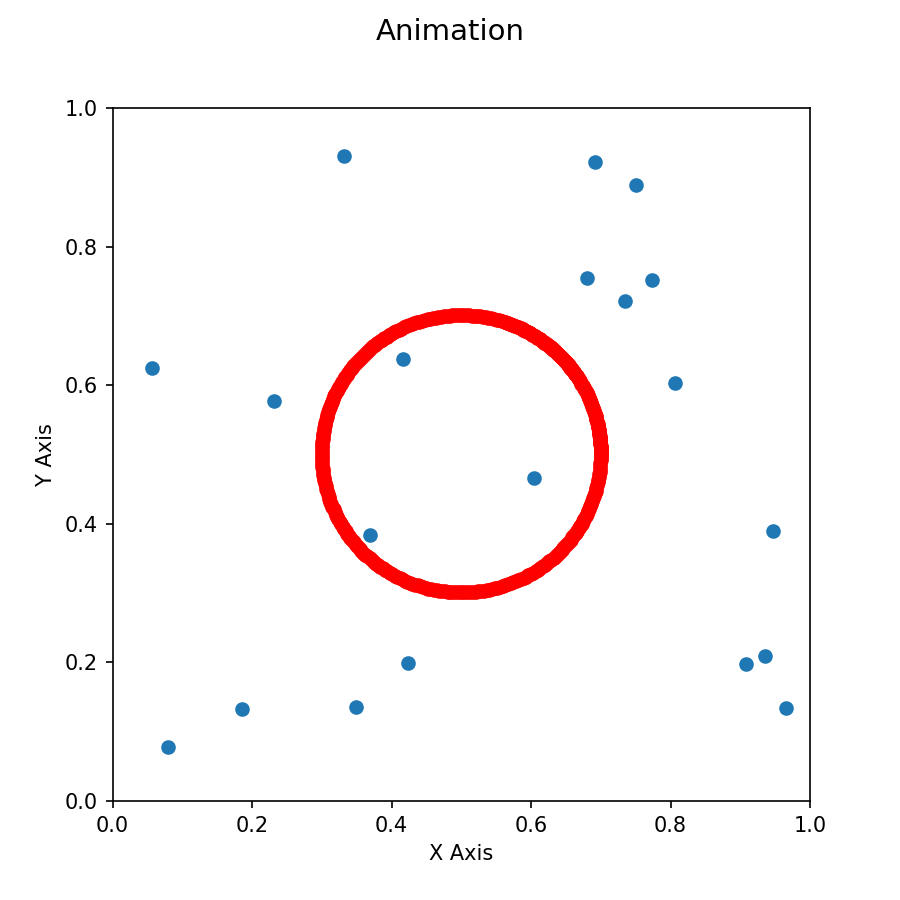

In [21]:
# Initialising the motion
x=[]
y=[]

# First we initialise the figure
fig, ax = plt.subplots()
#ax.set_xlim(0,1)
#ax.set_ylim(0,1)
fig.set_figheight(6)
fig.set_figwidth(6)
background = plt.scatter(px,py)
line, = plt.plot(0,0, 'ro')

# Making animation

def initial():
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    return line,

def animate(i):
    x.append(xp[i][0])
    y.append(xp[i][1])
    line.set_data(x,y)
    return line,


animation_trial = FuncAnimation(fig, func=animate, init_func=initial, frames=range(NUM), interval=10, blit=True)

fig.suptitle('Animation', fontsize=14)

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()